# 

### UFood Data Analysis Case: 
UFood is the lead food delivery app in Brazil, present in over a thousand cities. Keeping a high customer engagement is key for growing and consolidating the company’s position as the market leader. Data Analysts working within the data team are constantly challenged to provide insights and
value to the company through open scope projects. This case intends to simulate that. In this case, I am presented a sample dataset, that mocks metainformation on the customer and on UFood campaign interactions with that customer. It is my challenge to understand the data, find business opportunities & insights and to propose any data driven action to optimize the campaigns results & generate value to the company.


### Key Objectives are:
1. Explore the data – don’t just plot means and counts. Provide insights, define cause and
effect. Provide a better understanding of the characteristic features of respondents;
2. Propose and describe a customer segmentation based on customers behaviors;
3. Visualize data and provide written reasoning behind discoveries;
   
### The Company
Consider a well-established company operating in the retail food sector. Presently they have
around several hundred thousands of registered customers and serve almost one million
consumers a year. They sell products from 5 major categories: wines, rare meat products, exotic
fruits, specially prepared fish and sweet products. These can further be divided into gold and
regular products. The customers can order and acquire products through 3 sales channels: physical
stores, catalogs and company’s website. Globally, the company had solid revenues and a healthy
bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not
promising... For this reason, several strategic initiatives are being considered to invert this
situation. One is to improve the performance of marketing activities, with a special focus on
marketing campaigns.

### The Marketing Department
The marketing department was pressured to spend its annual budget more wisely. Desirably, the success
of these activities will prove the value of the approach and convince the more skeptical within the
company.

In [1]:
import pandas as pd

In [31]:
# Import our dataset and read in the first few rows
food = pd.read_csv(r'C:\Users\wgephar\OneDrive - Purdue Research Foundation\Python\u_food_marketing.csv')
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [32]:
# Set our columns and rows so that we can read everything in

pd.set_option('display.max.columns', 50)
pd.set_option('display.max.rows', 2300)

In [33]:
# Remove duplicates from our dataset

food.drop_duplicates(keep = False, inplace = True)

In [34]:
#Combine Kidhome and Teenhome columns to create a new column where we identify if the home has any children in general

food['Total_Children'] = food[['Kidhome','Teenhome']].sum(axis = 1)
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


In [35]:
#Combine martial_Divorced (5), marital_Married (4), marital_Single (3), marital_Together (2), and marital_Widow (1) into two columns Marital_Status
# and a string column for those labels

food['marital_Divorced']= food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married']= food['marital_Married'].replace({1:4,0:0})
food['marital_Single']= food['marital_Single'].replace({1:3,0:0})
food['marital_Together']= food['marital_Together'].replace({1:2,0:0})
food['marital_Widow']= food['marital_Widow'].replace({1:1,0:0})
food['Marital_Status'] = food [['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis=1)
food['Marital_Status_str'] = food['Marital_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,1,0,0,1529,1441,0,0,3,Single
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,1,0,0,21,15,0,2,3,Single
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,1,0,0,734,692,0,0,2,Together
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,1,0,0,48,43,0,1,2,Together
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,1,407,392,0,1,4,Married


In [41]:
# Doing the same thing we did with the marital statuses with their education statuses

food['education_2n Cycle']= food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic']= food['education_Basic'].replace({1:2,0:0})
food['education_Graduation']= food['education_Graduation'].replace({1:3,0:0})
food['education_Master']= food['education_Master'].replace({1:4,0:0})
food['education_PhD']= food['education_PhD'].replace({1:5,0:0})
food['Education_Status'] = food [['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis=1)
food['Education_Status_str'] = food['Education_Status'].map({5: 'PhD', 4: 'Master', 3: 'Graduation', 2: 'Basic', 1: 'Cycle'})

In [63]:
# Adding together the accepted campaign fields to make one boolean Accepted_Campaigns field to identify whether they accepted at least one campaign

food['Accepted_Campaigns'] = food [['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0


In [64]:
# Checking to see the correlations between our Accepted_Campaigns field and the other fields in our dataset

import seaborn as sns

all_correlations = food.corr(method = 'pearson', numeric_only = True)
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]
all_correlations['Accepted_Campaigns']

Income                       NaN
Kidhome                      NaN
Teenhome                     NaN
Recency                      NaN
MntWines                0.416651
MntFruits                    NaN
MntMeatProducts              NaN
MntFishProducts              NaN
MntSweetProducts             NaN
MntGoldProds                 NaN
NumDealsPurchases            NaN
NumWebPurchases              NaN
NumCatalogPurchases     0.322143
NumStorePurchases            NaN
NumWebVisitsMonth            NaN
AcceptedCmp3            0.453742
AcceptedCmp4            0.465985
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
AcceptedCmp2                 NaN
Complain                     NaN
Z_CostContact                NaN
Z_Revenue                    NaN
Response                0.685109
Age                          NaN
Customer_Days                NaN
marital_Divorced             NaN
marital_Married              NaN
marital_Single               NaN
marital_Together             NaN
marital_Wi

In [73]:
# Define age groups for each row in our dataset for easier segmentation later on when we start visualizing the data

age_groups = [(21,30), (31,40), (41,50), (51,60), (61,70), (71, 80), (81,90)]

def assign_age_group(Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return ("Unknown")

food['Age_Group'] = food['Age'].apply(assign_age_group)
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Marital_Status,Marital_Status_str,Education_Status,Education_Status_str,Accepted_Campaigns,Age_Group
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,Graduation,1,61 - 70
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3,Graduation,0,61 - 70
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3,Graduation,0,51 - 60
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3,Graduation,0,31 - 40
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5,PhD,0,31 - 40


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

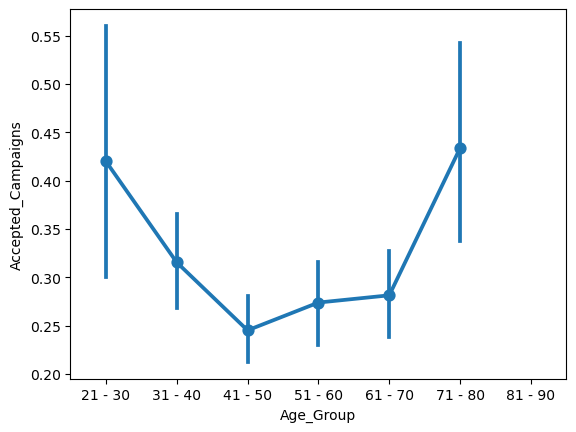

In [77]:
# Creat a pointplot showing the overall acceptance rate for each of the age groups in our dataset while also showing the confidence interval in the point plot

age_order = ['21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80', '81 - 90']
sns.pointplot(data = food, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order)

In [86]:
# Creating a custom dataframe showing the percentage of age groups in our dataset so that we can visualize it with a barplot

counts = food['Age_Group'].value_counts()

percentage = counts/food.shape[0]

percent_food = percentage.reset_index()

percent_food.columns = ['Age_Group', 'Percentage']

percent_food = percent_food.sort_values('Age_Group')
                                        
percent_food

,Age_Group,Percentage
5,21 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 80,0.045035


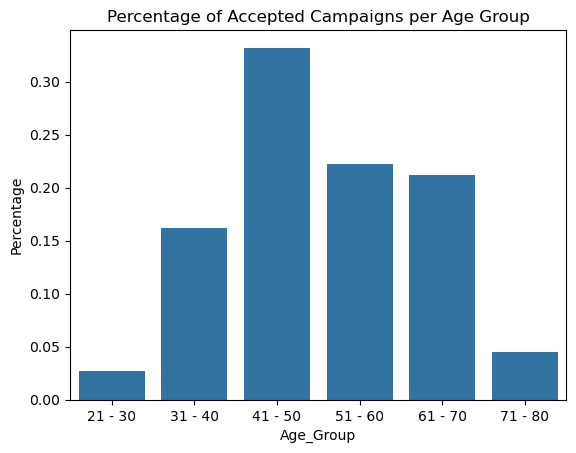

In [92]:
# Create a bar plot showing the percentage of accepted campaigns by age group

import matplotlib.pyplot as plt

sns.barplot(x = 'Age_Group', y = 'Percentage', data = percent_food)
plt.title('Percentage of Accepted Campaigns per Age Group')
plt.show()

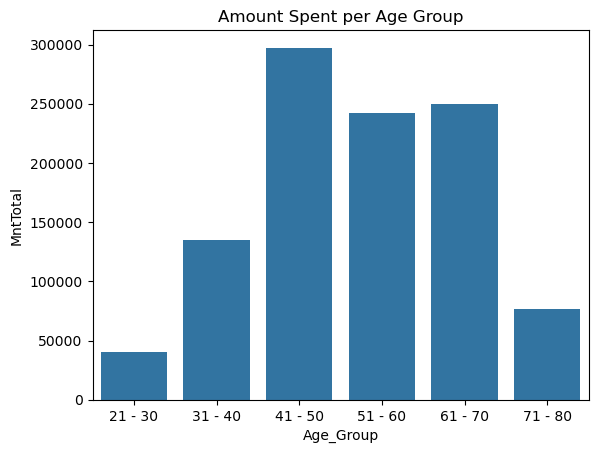

In [96]:
# Bar plot showing the amount total spent by each age group

grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food)
plt.title('Amount Spent per Age Group')
plt.show()

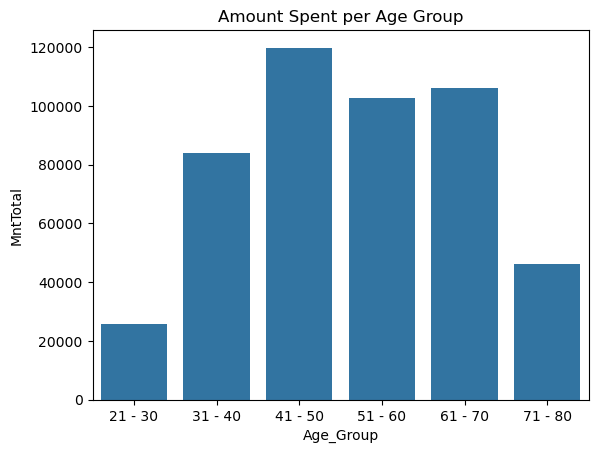

In [100]:
# Same bar plot as above but only showing those individuals who accepted a campaign

acct_camp = food[food['Accepted_Campaigns'] != 0]

grouped_food = acct_camp.groupby('Age_Group')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Age_Group', y = 'MntTotal', data = grouped_food)
plt.title('Amount Spent per Age Group')
plt.show()

In [ ]:
# Age Segmentation - Our core audience for accepting campaigns right now is 31 - 70 year olds. 23-30, 71 and up accept at higher rates

<Axes: xlabel='Type_of_Purchase', ylabel='Sum'>

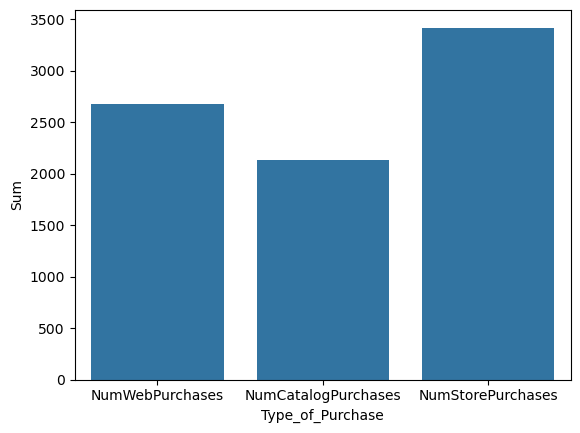

In [113]:
# Bar Plot showing the Amount Spent per each Type of Purchase for those that accepted campaigns

acct_camp = food[food['Accepted_Campaigns'] != 0]
sum_food = pd.DataFrame(acct_camp [['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(), columns = ['Sum']).reset_index()
sum_food.rename(columns = {'index': 'Type_of_Purchase'}, inplace = True)
sns.barplot(x = 'Type_of_Purchase', y = 'Sum', data = sum_food)

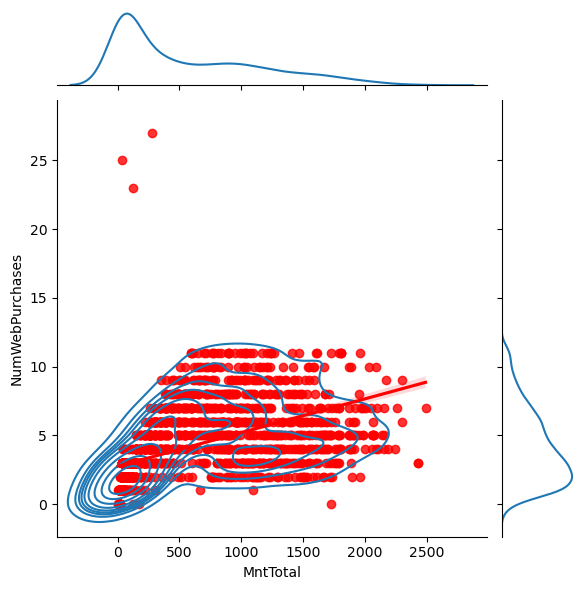

In [116]:
# In the next 3 plots we will do a joint plot for each of the purchase types showing their distribution of the number of purchases and the total spent

x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'r')

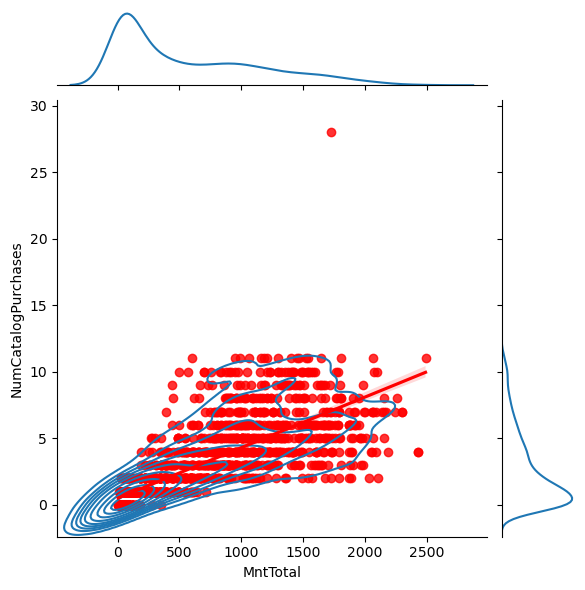

In [117]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumCatalogPurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'r')

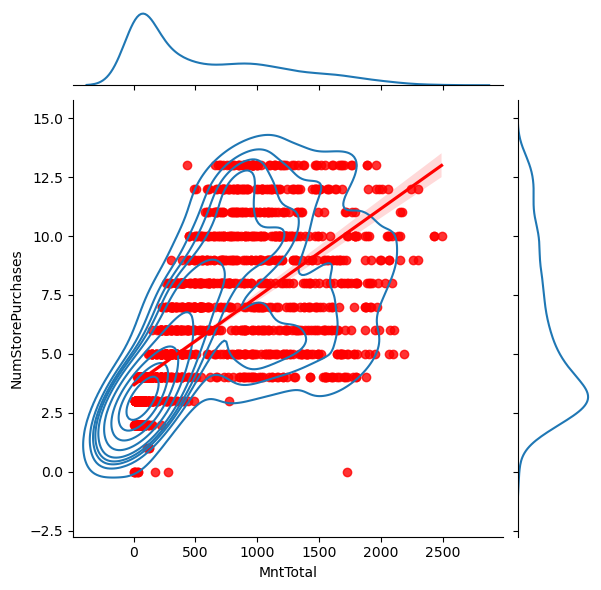

In [118]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumStorePurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'r')

In [ ]:
# 2 directions: Boost up the higher percentage catalog customers. OR Focus on In Store/Web because they have more traffic

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

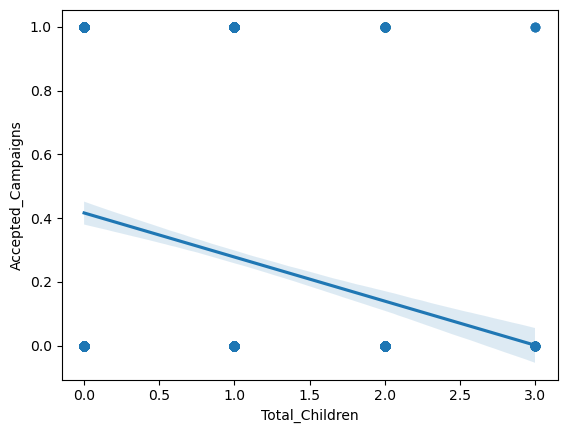

In [121]:
# Reg plot showing the relationship between total children and accepted campaigns


sns.regplot(x = 'Total_Children', y = 'Accepted_Campaigns', data = food)

<Axes: xlabel='Total_Children', ylabel='MntTotal'>

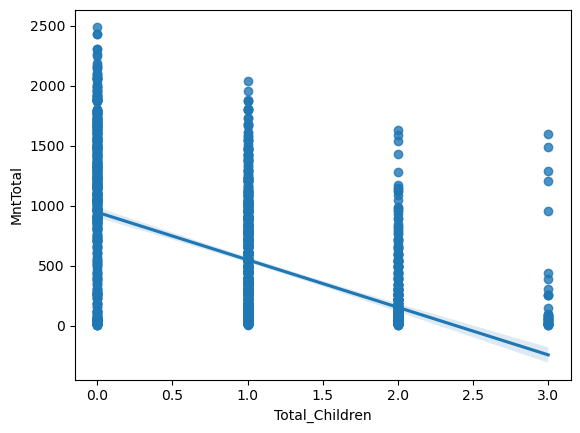

In [123]:
# Reg plot showing the relationship between total children and amount spent


sns.regplot(x = 'Total_Children', y = 'MntTotal', data = food)

In [ ]:
# Less kids = More likely to accept campaigns AND spend more money

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

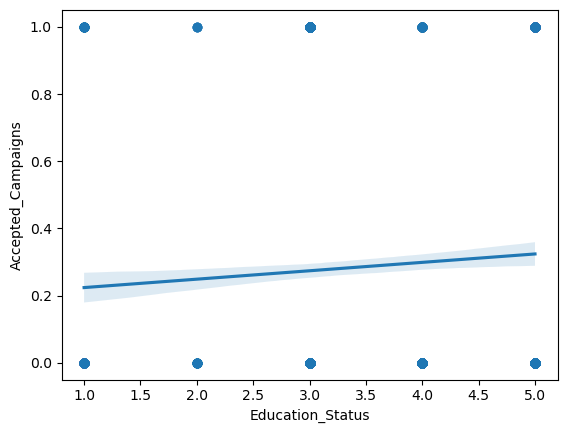

In [124]:
# Reg plot showing the relationship between education status and accepted campaigns


sns.regplot(x = 'Education_Status', y = 'Accepted_Campaigns', data = food)

<Axes: xlabel='Education_Status', ylabel='MntTotal'>

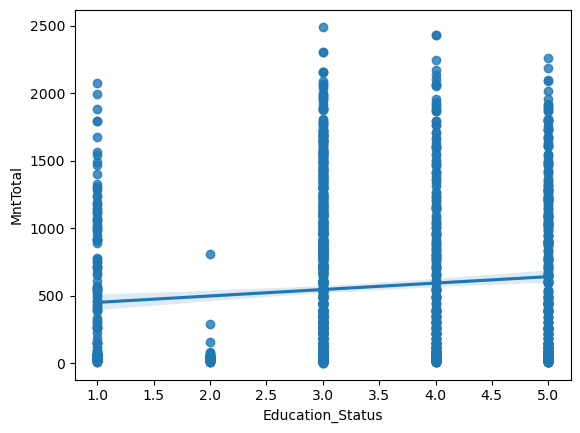

In [126]:
# Reg plot showing the relationship between education status and amount spent

sns.regplot(x = 'Education_Status', y = 'MntTotal', data = food)

In [ ]:
# Education is not a significant indicator in our segmentation

<Axes: xlabel='Marital_Status_str', ylabel='count'>

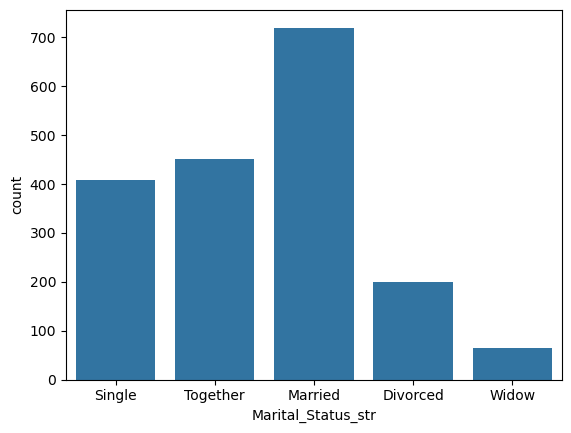

In [127]:
# Count plot showing how many individuals fell into each marital status

sns.countplot(x = 'Marital_Status_str', data = food)

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

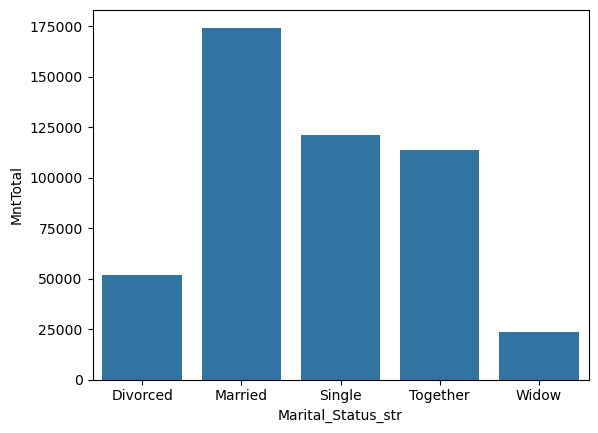

In [138]:
# Bar plot showing the amount spend by marital status of those that accepted campaigns

accept = food[food['Accepted_Campaigns'] != 0]
rel_food = accept.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()
sns.barplot(x = 'Marital_Status_str', y = 'MntTotal',  data = rel_food)

In [143]:
# Create a dataframe showin the percentage of individuals who have accepted campaigns that fall into each marital status

total = food['Marital_Status_str'].value_counts()
accepted = food[food['Accepted_Campaigns'] == 1]['Marital_Status_str'].value_counts()
percent_marital = accepted / total * 100
percent_food = percent_marital.reset_index()
percent_food.columns = ['Marital_Status', 'Percentage']
percent_food

,Marital_Status,Percentage
0,Divorced,28.643216
1,Married,26.111111
2,Single,32.762836
3,Together,26.607539
4,Widow,37.500000


<Axes: xlabel='Marital_Status', ylabel='Percentage'>

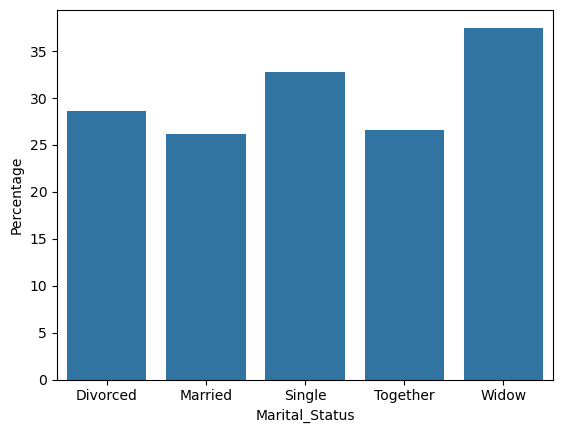

In [144]:
sns.barplot(x = 'Marital_Status', y = 'Percentage', data = percent_food)

In [ ]:
# Marriage - Married, Single, and Together are spending much more money than Widow and Divorced. We should focus on this segment

# OVERALL FINDINGS

### 1. Age - 30-70 were spending more money, but less likely to accept campaigns. Higher volume here though.
### 2. Catalog was more likely to accept campaigns, but in person spend more. Recommend a split between all.
- 40% catalog, 30% store, 30% web
### 3. Focus on people with no kids (or less kids)
### 4. Education - No impact - don't target any group based on this variable
### 5. Marital status - Does not play a big part in our analysis. Married, Single, Together spend the most money


# Recommendations
1. Middle Aged People, high earners, with no kids. Target on different platforms with split above.
2. Focus on 21-30 year olds and 70+ year olds who statistically accepted campaigns at a higher rate but hadn't spent much money